In [1]:
%display latex

<h1><center>TP3</center></h1>
<h2><center>Systèmes d'équations différentielles</center></h2>

<center> Auteurs: P.DI MUZIO -- S.MARTINS DOS SANTOS</center>

# Systèmes d'équations différentielles linéaires $2 \times 2$

Un systèmes d'équations différentielles linéaires $2 \times 2$ est donné par les équations
\begin{eqnarray}
\frac{d}{dt} u_1 &=& A u_1 + B u_2 \\
\frac{d}{dt} u_2 &=& C u_1 + D u_2
\end{eqnarray}
où $A,B,C,D \in \mathbb{R}$ sont des constantes, appellées *paramètres-système*. Une *solution* est un couple de fonctions $u_1,u_2:\mathbb{R} \rightarrow \mathbb{R}$ vérifant ces équations. La commande **SAGE** `desolve_system` produit une solution analytique (c'est à dire $u_1$ et $u_2$ sont données par une *formule*). 

In [2]:
t = var('t')
u1 = function('u1')(t)
u2 = function('u2')(t)

In [3]:
A = 0
B = 5
C = -1
D = 2
i1 = 4
i2 = 6

In [4]:
deq1 = diff(u1,t) == A*u1 + B*u2
deq2 = diff(u2,t)  == C*u1 + D*u2
u1_eq,u2_eq = desolve_system([deq1, deq2], [u1,u2], ics=[0,i1,i2])
u1_eq,u2_eq

(u1(t) == (4*cos(2*t) + 13*sin(2*t))*e^t, u2(t) == (6*cos(2*t) + sin(2*t))*e^t)

In [5]:
col1 = Color('#b30000')
col2 = Color('#8a00e6')
col_phases = Color('#2eb82e')
size = 6

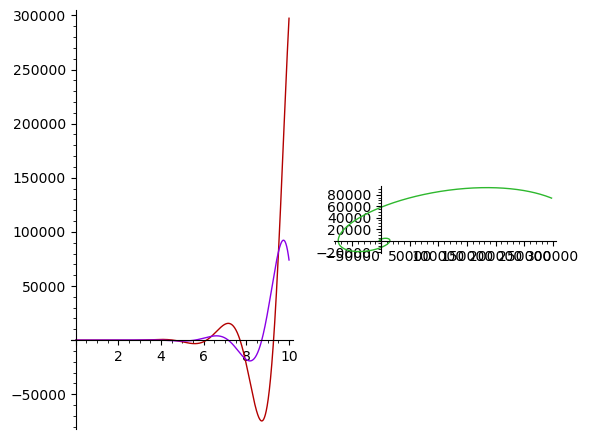

In [6]:
interval = (0,10)
u1_fun(t) = u1_eq.rhs()
u2_fun(t) = u2_eq.rhs()
u1_plot = plot(u1_fun, interval,color=col1)
u2_plot = plot(u2_fun, interval,color=col2)
u1_u2_plot = parametric_plot((u1_fun,u2_fun), interval,color=col_phases)
show(graphics_array([u1_plot+u2_plot,u1_u2_plot]), figsize = size)

In [7]:
A = 1
B = -3
C = 6
D = -1
i1 = 0
i2 = 6

In [8]:
deq1 = diff(u1,t) == A*u1 + B*u2
deq2 = diff(u2,t)  == C*u1 + D*u2
u1_eq,u2_eq = desolve_system([deq1, deq2], [u1,u2], ics=[0,i1,i2])
u1_eq,u2_eq

(u1(t) == -18/17*sqrt(17)*sin(sqrt(17)*t),
 u2(t) == -6/17*sqrt(17)*sin(sqrt(17)*t) + 6*cos(sqrt(17)*t))

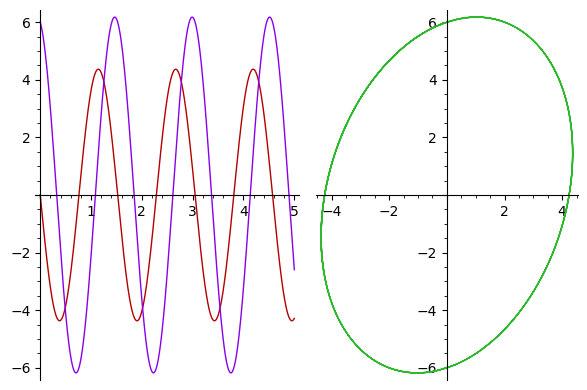

In [9]:
interval = (0,5)
u1_fun(t) = u1_eq.rhs()
u2_fun(t) = u2_eq.rhs()
u1_plot = plot(u1_fun, interval,color=col1)
u2_plot = plot(u2_fun, interval,color=col2)
u1_u2_plot = parametric_plot((u1_fun,u2_fun), interval,color=col_phases)
show(graphics_array([u1_plot+u2_plot,u1_u2_plot]), figsize = size)

## Exercice 1

1. Écrivez une fonction `solver(A,B,C,D,i1,i2)` qui prend en arguments 

- les paramètres-système $A,B,C,D$;
- les conditions initiales $i_0,i_1$ 
et retourne une solution *symbolique* (c'est à dire un couple $u_1,u_2$ de *fonctions symboliques*).

2. Écrivez une fonction `plotter(u1,u2,I,col_1=C_1, col_2=C_2, col_1_2 = C_1_2,size = 6)` qui prend en arguments
- un couple de fonctions $u_1$ et $u_2$;
- un intervalle $I$
et qui affiche un graphique composé de graphes de $u_1$ et $u_2$ superposés d'une part, et du graphe de la courbe paramétrique determinée par $u_1$ et $u_2$ de l'autres, ceci sur l'intervalle $I$. Les paramètres optionels (avec défauts) determinent les couleurs des courbes et la taille du graphique.

3. Testez vos foncions avec les exemples ci-dessus.

### On écrit un solveur

In [10]:
def solver(A,B,C,D,i1,i2):
    t = var('t')
    u1 = function('u1')(t)
    u2 = function('u2')(t)
    deq1 = diff(u1,t) == A*u1 + B*u2
    deq2 = diff(u2,t)  == C*u1 + D*u2
    sol1, sol2 = desolve_system([deq1, deq2], [u1,u2], ics=[0,i1,i2])
    return sol1, sol2

#### On teste notre solveur 
On utilise les valeurs de A,B,C,D i1, i2 données plus haut.

In [11]:
solver(A,B,C,D,i1,i2)

(u1(t) == -18/17*sqrt(17)*sin(sqrt(17)*t),
 u2(t) == -6/17*sqrt(17)*sin(sqrt(17)*t) + 6*cos(sqrt(17)*t))

### On écrit une fonction qui plot notre résultat

In [12]:
C_1 = Color('#b30000')
C_2 = Color('#8a00e6')
C_1_2= Color('#2eb82e')

def plotter(u1,u2,I,col_1=C_1, col_2=C_2, col_1_2 = C_1_2,size = 6):
    interval = I
    u1_fun(t) = u1.rhs()
    u2_fun(t) = u2.rhs()
    u1_plot = plot(u1_fun, interval,color=col1)
    u2_plot = plot(u2_fun, interval,color=col2)
    u1_u2_plot = parametric_plot((u1_fun,u2_fun), interval,color=col_phases)
    show(graphics_array([u1_plot+u2_plot,u1_u2_plot]), figsize = size)

#### On teste notre fonction plotter()
On emploit le même procédé que pour la partie 1.3

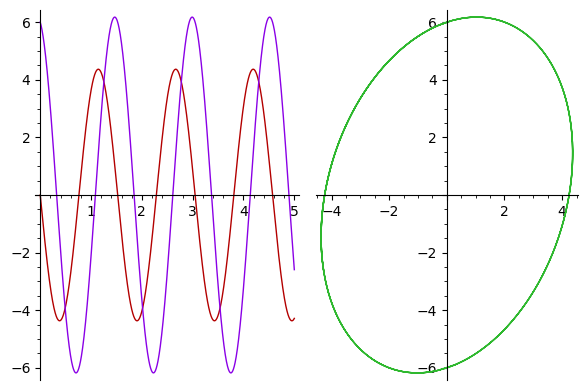

In [13]:
u1, u2 = solver(A,B,C,D,i1,i2)
plotter(u1,u2, (0,5))

# Romeo et Juliette

- Romeo, c'est simple: plus Juliette l'aime plus son amour pour elle est fort
- Juliette, c'est plus compliqué: aimer Romeo lui fait du bien du coup elle l'aime plus, mais elle  réagit avec reserve quand l'amour de Romeo devient trop fort pour elle. 

Appellons cela *relation de type I*. 

Modelisons cette dynamique de couple au moyen d'un système d'équadiffs linéaires où $r$ est l'intensité de l'amour de Romeo alors que $j$ est l'intensité de l'amour de Juliette 
\begin{eqnarray}
r' &=& 5 j \\
j' &=& -r + 2 j
\end{eqnarray}
($>0$ c'est l'amour, $<0$ c'est le désamour et $=0$ c'est l'indifférence). On a donc $A=0$, $B=5$, $C=-1$ et $D = 2$. 
Supposons que l'attraction est mutuelle à la première rencontre, ce qui se traduit par les conditions initiales $r(0) = 4$ et $j(0)=6$.

## Exercice 2

1. Expliquez le raisonment derrière cette modélisation.
2. Comme vous pouvez le constater, nous avons calculé auparavant une solution analytique de l'équadiff en question et produit un graphique. Interpretez ce dernier en termes de la relation entre Romeo et Juliette.
3. Charactérisez une relation de type I en termes des coefficients-système.

### Explications de la modélisation
On représente l’amour de Roméo et de Juliette avec des fonctions mathématiques : $r$ et $j$. On lie les deux de sorte à ce que l’amour de Roméo dépende de celui de Juliette et inversement. On a ainsi le choix des facteurs de dépendance entre Roméo et Juliette, par exemple les conditions initiales et les facteurs d’influence d’amour.

### Explication du graphe précédent
Plus le temps passera, plus l’intensité de leurs émotions sera grand (plus les valeurs de $r$ et $j$ prendront de grandes valeurs en divergeant en +$\infty$)

### Ecriture en coéfficient système
Avec $k, j, h>0$
\begin{eqnarray}
u_1' &=& k u_2 \\
u_2' &=& -ju_1 + h u_2
\end{eqnarray}

## Exercice 3

En utilisant votre solver et votre plotter, trouvez des exemples de relations de type I avec une dynamique plus stable (la courbe parmétrique est fermée, ou s'en approchant) en jouant sur les parmètres-système.

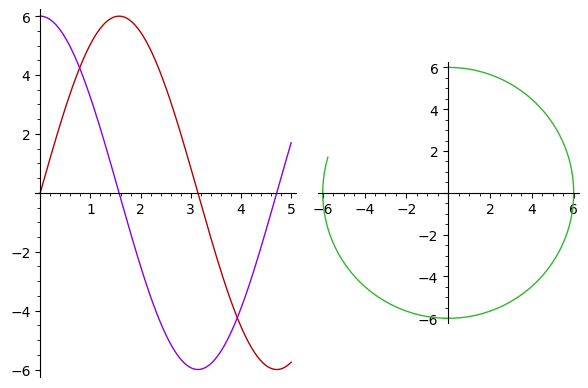

In [14]:
u1, u2 = solver(0,1,-1,0,i1,i2)
plotter(u1, u2, (0,5))

On a ici un système  de relation $I$ très stable vu que cyclique sinusoïdale.

## Exercice 4

Modélisez des relations autres que de type I, au minimum

1. Les oposés s'attirent.
2. L'amour mutuel eternel.

**Indication**: il vous faut

1. Expliquer votre modélisation.
2. Afficher cette dernière au moyen de votre solver et de votre plotter.

### Les opposés s'attirent
Les sentiments négatifs de l’un motivent les sentiments positifs de l’autre, c'est à dire que lorsque Roméo a des sentiments très négtifs pour Juliette, cela l'attire:

\begin{eqnarray}
r' &=& -j\\
j' &=& -r
\end{eqnarray}

Les conditions de départs sont importantes, en effet, si $j(0)=r(0)$ alors $\lim\limits_{t \rightarrow +\infty} j = \lim\limits_{t \rightarrow +\infty} r =0$
Dans les autres cas, leur amour augmente exponentiellement vers $+\infty$ pour celui  dont les conditions initiales sont maximale aux deux et $-\infty$ pour celui dont les conditions initiales sont minimales au deux.

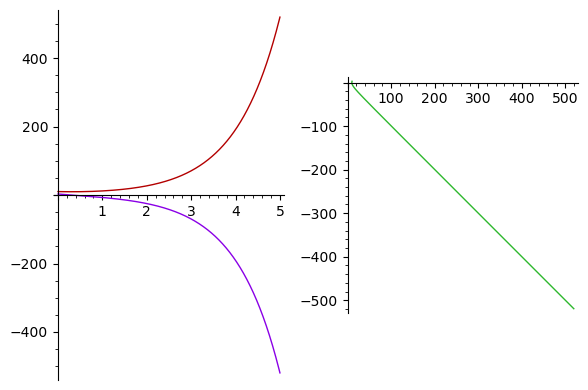

In [15]:
r, j = solver(0,-1,-1,0,10,3)
plotter(r,j,(0,5))

### L'amour mutuel eternel:
Quand l'amour de l'un est positif, l'amour de l'autre augmente et réciproquement:
\begin{eqnarray}
r' &=& j\\
j' &=& r
\end{eqnarray}

On a donc plusieurs cas qui différent selon les conditions initiales:
- Si $r(0)$ et $j(0) > 0$ alors $\lim\limits_{t \rightarrow +\infty} r = \lim\limits_{t \rightarrow +\infty} j = +\infty$
- Si $r(0)$ et $j(0) < 0$ alors $\lim\limits_{t \rightarrow +\infty} r = \lim\limits_{t \rightarrow +\infty} j = -\infty$
- Si $r(0) > 0$ et $j(0) < 0$  alors $\lim\limits_{t \rightarrow +\infty} r = \lim\limits_{t \rightarrow +\infty} j = 0$
- Si $r(0) < 0$ et $j(0) > 0$  alors $\lim\limits_{t \rightarrow +\infty} r = \lim\limits_{t \rightarrow +\infty} j = 0$
- Si $r(0) = j(0) = 0$  alors $r(x)=j(x)=0$

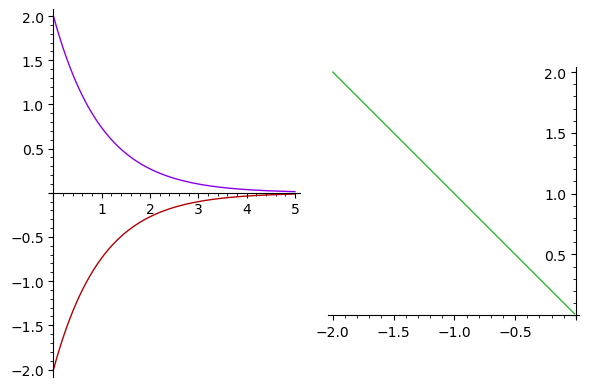

In [16]:
r, j = solver(0,1,1,0,-2,2)
plotter(r,j,(0,5))

# Zombie Apocalypse

Une fois de plus, les zombies attaquent. Supposons les fonctions

- $h$ representant le nombre d'humains;
- $z$ representant le nombre de zombies;
- $e$ representant le nombre d'*éliminé.e.s*

à l'instant $t$. Les éliminé.e.s sont

- les zombies morts (c'est possible mais il faut que leur cerveau soit détruit);
- les humains morts du fait des zombies (ces personnes peuvent donc ressusciter en tant que zombies);
- les humains morts d'une mort "naturelle" (les zombies n'y sont pour rien).

Un système simple d'équadiffs modellisant ces populations est
$$
h' = \Gamma - \iota h z - \delta h \\
z' = \iota h z + \zeta e - \epsilon h z \\
e' = \delta h + \epsilon h z -\zeta e
$$

où

- $\Gamma$ est le taux des naissances des humains (on suppose qu'il est constant);
- $\delta$ est la proportion des humains decedés de causes autres qu'une attaque de zombies;
- $\zeta$ est la proportion des humains qui peuvent ressusciter en tant que zombies.

Ce système n'est pas linéaire, les termes non-linéaires correspondent aux interactions entre humains et zombies:

- un humain éliminant un zombie (par destruction du cerveau) ($- \epsilon h z$ et $+ \epsilon h z$);
- un zombie infectant un humain ($-\iota h z$ et $+\iota h z$)

Ce système est trop compliqué pour chercher une solution analytique.

In [17]:
def zombie_solver(
    epsilon,iota,delta,zeta,Gamma, # system params
    i1=11,i2=10,i3=5, # intial conditions
    h_col=Color('#6600cc'),
    z_col=Color('#cc0000'),
    e_col =Color('#3d5c5c')
    ):
    t,h,z,e = var('t,h,z,e')
    equ1 = Gamma - iota*h*z - delta*h
    equ2 = iota*h*z + zeta*e - epsilon*h*z
    equ3 = delta*h + epsilon*h*z - zeta*e
    data_points = desolve_system_rk4([equ1,equ2,equ3],[h,z,e],ics=[0,i1,i2,i3] ,ivar=t,end_points=30)
    H = list_plot([[t,h] for t,h,z,e in data_points], plotjoined=True, color=h_col, legend_label='Humains')
    Z = list_plot([[t,z] for t,h,z,e in data_points], plotjoined=True, color=z_col,legend_label='Zombies')
    E = list_plot([[t,e] for t,h,z,e in data_points], plotjoined=True, color=e_col,legend_label='Eliminé.e.s')
    show(H + Z + E)

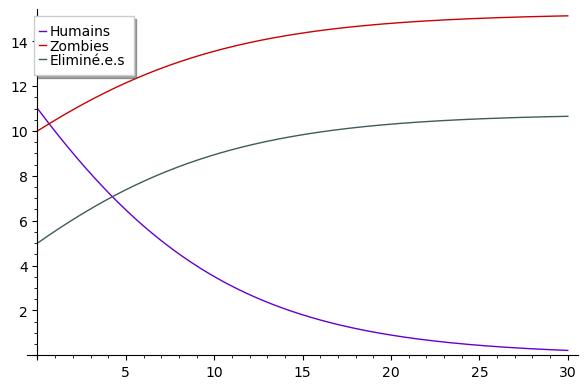

In [18]:
epsilon = 0.005
iota = 0.0095
delta = 0.0001
zeta = 0.0001
Gamma = 0.0
zombie_solver(epsilon,iota,delta,zeta,Gamma)

Les zombies gagnent haut la main alors que la population humaine est anéantie!

## Exercice 5

Trouvez des scénarios (paramètres-système) de Zombie Apocalype où

1. Les zombies gagnent mais les populations humaine et zombie sont toutes les deux anéanties.
2. Les humains gagnent mais les populations humaine et zombie sont toutes les deux anéanties.
3. Les humains gagnent, la population humaine n'est pas anéantie alors que c'est le cas pour la population zombie.

### Les zombies gagnent mais les populations humaines et zombies sont toutes les deux anéanties

Pour faire en sorte que les zombies gagnent mais meurent, il faudrait avoir une cause de décès naturelle chez les zombies. Sans cela, on peut juste s'amuser à approcher les valeurs de epsilon et de iota en fixant les autres valeurs de sorte à avoir deux courbes qui semblent converger vers $0$ en même temps. Le graphe du dessous n'est pas parfait et si étendu à l'infini, une population est sans doute gagante cependant il fournit une bonne approximation de ce à quoi un graphe ou les deux populations meurent simultanément suite à une victoire zombie ressemble.

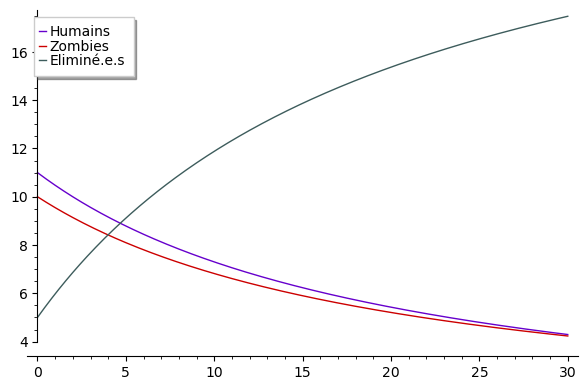

In [19]:
epsilon = 0.0093    #Humains tuant les zombies
iota = 0.005        #Zombies infectants humains
delta = 0           #Proportion de mort naturelle humaine
zeta = 0            #Resurection en zombies
Gamma = 0           #Taux de naissance
zombie_solver(epsilon,iota,delta,zeta,Gamma)

### Les humains gagnent mais les populations humaines et zombies sont toutes les deux anéanties

Pour faire en sorte que les humains gagnent mais disparaissent, il suffit que les zombies soient tous éliminés et que les humains décèdent de causes naturelles pour que les deux camps fassent match nul. Il faut aussi s'assurer que les zombies ne puissent pas ressuciter.

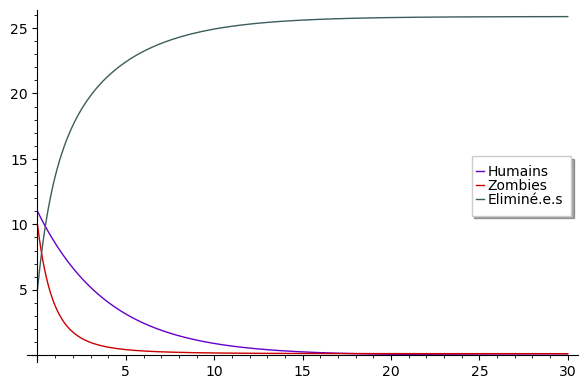

In [20]:
epsilon = 0.1        #Humains tuant les zombies
iota = 0.0           #Zombies infectants humains
delta = 0.25         #Proportion de mort naturelle humaine
zeta = 0             #Resurection en zombies
Gamma = 0            #Taux de naissance
zombie_solver(epsilon,iota,delta,zeta,Gamma)

### Les humains gagnent et la population humaine n'est pas anéantie

Pour que les humains l'emportent sur les zombies, il suffit de fixer les paramètres qui pourrait géner la progression de notre population humaine: on empèche les zombies de ressuciter, on les rend moins dangereux que les humains et on laisse la population humaine s'en charger

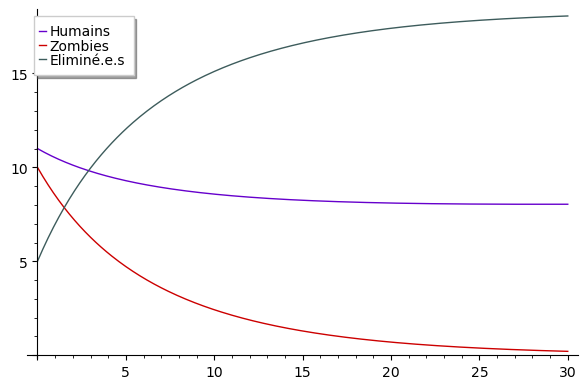

In [21]:
epsilon = 0.02       #Humains tuant les zombies
iota = 0.005         #Zombies infectants humains
delta = 0            #Proportion de mort naturelle humaine
zeta = 0             #Resurection en zombies
Gamma = 0.01         #Taux de naissance
zombie_solver(epsilon,iota,delta,zeta,Gamma)